In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw

In [1]:
import sys
root_dir = "\\".join(sys.path[0].split("\\")[:-2])

The network is a directed graph of papers (nodes) and citations (edges). Here, we are interpreting it as a directed graph.

In [4]:
edges_pp = pd.read_csv(root_dir+"\\data\\og\\edges_pp.csv")
all_papers = list(set(edges_pp.src.values.tolist()+edges_pp.dst.values.tolist()))

In [5]:
citation_network = nx.DiGraph()

In [6]:
for paper in all_papers:
    if paper==paper:
        citation_network.add_node(paper)

In [7]:
for i in range(len(edges_pp)):
    citation_network.add_edges_from(
        [(edges_pp.src[i], edges_pp.dst[i])])

In [8]:
print("Edges: ", len(list(citation_network.edges(data=True))))
print("Nodes: ", len(list(citation_network.nodes(data=True))))

Edges:  731480
Nodes:  107375


In [12]:
in_degree = dict(citation_network.in_degree())
degree_sequence = sorted([in_degree.get(k,0) for k in citation_network.nodes()])

In [13]:
fit = powerlaw.Fit(degree_sequence)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
C:\Users\lmccabe\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [14]:
fit.power_law.alpha

2.679622191719841

Cite:
1. https://ieeexplore.ieee.org/document/5658791

We consider the in-degree, as per [1]. We find a power law exponent of 2.68, similar to the corresponding value found by Newman in biomedical collaboration networks [2].

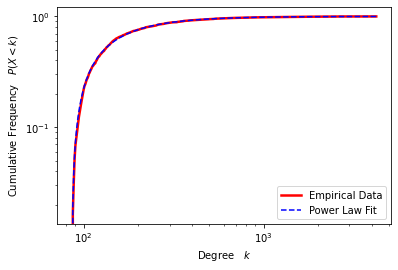

In [15]:
fig = fit.plot_cdf(color='r', linewidth=2.5, label="Empirical Data")
fit.power_law.plot_cdf(color='b', linestyle='--', ax=fig, label="Power Law Fit")
plt.xlabel("Degree   $k$")
plt.ylabel("Cumulative Frequency   $P(X < k)$")
plt.legend()
plt.show()

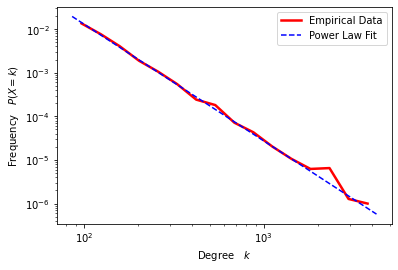

In [16]:
fig = fit.plot_pdf(color='r', linewidth=2.5, label="Empirical Data")
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig, label="Power Law Fit")
plt.xlabel("Degree   $k$")
plt.ylabel("Frequency   $P(X = k)$")
plt.legend()
plt.show()

In [18]:
R, p = fit.distribution_compare(
    'power_law',
    'lognormal',
    normalized_ratio=True)
print (R, p)

-0.058225463058545986 0.9535690385371666


In [19]:
R, p = fit.distribution_compare(
    'power_law',
    'exponential',
    normalized_ratio=True)
print (R, p)

5.938708213005965 2.872766364212412e-09


In [20]:
# stretched exponential = Weibull
R, p = fit.distribution_compare(
    'power_law',
    'stretched_exponential',
    normalized_ratio=True)
print (R, p)

1.4305141416160496 0.15256950998957206
